# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [255]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###

import numpy as np
import pandas as pd

# Packages for visualization
### YOUR CODE HERE ###

import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###

from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [256]:
pd.set_option('display.max_columns', None)

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [257]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset you can create a duration variable by subtracting tpep_dropoff from tpep_pickup time.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [258]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print(df0.shape)
print(df0.info())


(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [259]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [260]:
df0.duplicated().sum()

0

Use `.describe()`.

In [261]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [262]:
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [263]:
df0.head(2)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80


In [264]:
df0 = df0.rename(columns = {'tpep_pickup_datetime': 'pickup_time', 'tpep_dropoff_datetime' : 'dropoff_time' })

In [265]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'pickup_time', 'dropoff_time',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

### Task 2b. Convert pickup & dropoff columns to datetime


In [266]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###

df0['dropoff_time'] = pd.to_datetime(df0['dropoff_time'])
df0['pickup_time'] = pd.to_datetime(df0['pickup_time'])


In [267]:
# Check the format of the data
### YOUR CODE HERE ###

df0.dtypes


Unnamed: 0                        int64
VendorID                          int64
pickup_time              datetime64[ns]
dropoff_time             datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [268]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = (df0['dropoff_time'] - df0['pickup_time'])/np.timedelta64(1,'m')

In [269]:
df0.head()

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [270]:
### YOUR CODE HERE ###

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   pickup_time            22699 non-null  datetime64[ns]
 3   dropoff_time           22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [271]:
df0[['trip_distance', 'fare_amount', 'duration']].describe()

,trip_distance,fare_amount,duration
count,22699.000000,22699.000000,22699.000000
mean,2.913313,13.026629,17.013777
std,3.653171,13.243791,61.996482
min,0.000000,-120.000000,-16.983333
25%,0.990000,6.500000,6.650000
50%,1.610000,9.500000,11.183333
75%,3.060000,14.500000,18.383333
max,33.960000,999.990000,1439.550000


Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

Text(0, 0.5, ' ')

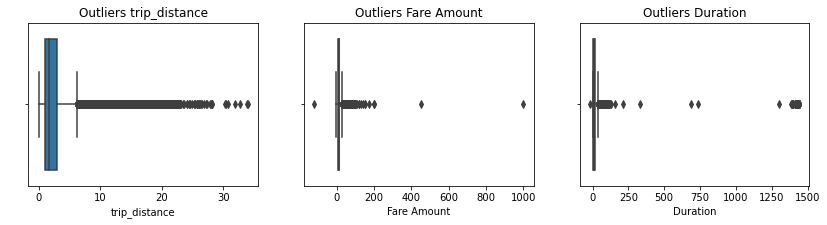

In [272]:
### YOUR CODE HERE ###
fig , axes = plt.subplots(1,3, figsize = (14,3))

sns.boxplot(x= df0['trip_distance'], ax =axes[0])
sns.boxplot(x= df0['fare_amount'], ax =axes[1])
sns.boxplot(x= df0['duration'], ax =axes[2])


axes[0].set_title('Outliers trip_distance')
axes[0].set_xlabel('trip_distance')
axes[0].set_ylabel(' ')

axes[1].set_title('Outliers Fare Amount')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel(' ')

axes[2].set_title('Outliers Duration')
axes[2].set_xlabel('Duration')
axes[2].set_ylabel(' ')


**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

A1. All 3 variables plotted have outliers as seen in the boxplot
A2. The values in the trip distance seem unusual as there is a large quanitity of outliers.
A3. There are few trip durations and fare amounts that are below zero that will have to be examined and potentially removed from the dataframe.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [273]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
df0_trip = df0.drop_duplicates()
df0_trip = df0[df0['trip_distance'] <= 0]
df0_trip = df0.sort_values('trip_distance', ascending = True)
df0_trip.head(10)

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.0,1,N,41,264,2,10.5,0.0,0.5,0.0,0.0,0.3,11.3,0.000000
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.0,1,N,246,264,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.000000
6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.0,5,N,61,61,1,18.0,0.0,0.0,2.0,0.0,0.3,20.3,0.066667
13561,14504365,1,2017-02-23 16:06:31,2017-02-23 16:06:54,2,0.0,5,N,175,175,3,32.0,0.0,0.0,0.0,0.0,0.3,32.3,0.383333
12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.0,1,N,145,145,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.233333
6878,69466211,2,2017-08-17 04:06:26,2017-08-17 04:06:29,4,0.0,5,N,100,100,1,98.5,0.0,0.5,0.0,0.0,0.3,99.3,0.050000
14372,108639975,1,2017-12-22 13:39:55,2017-12-22 13:44:23,1,0.0,1,N,226,226,2,4.5,0.0,0.5,0.0,0.0,0.3,5.3,4.466667
20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.0,1,N,43,264,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,0.000000
920,92102517,2,2017-10-31 20:29:53,2017-10-31 20:30:27,1,0.0,1,N,50,50,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.566667
16263,5716905,1,2017-01-27 20:58:29,2017-01-27 20:58:50,1,0.0,1,N,249,249,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.350000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [274]:
### YOUR CODE HERE ###

df0[df0['trip_distance'] == 0].shape

(148, 19)

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

#### `fare_amount` outliers

In [275]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [276]:
iqr = 14.5-6.5
upper_limit_initial = 14.5 + (1.5*iqr)
upper_limit = 14.5 + (6*iqr)
print('IQR', iqr)
print('Upper Limit', upper_limit_initial)
print('Upper Limit Used', upper_limit)

IQR 8.0
Upper Limit 26.5
Upper Limit Used 62.5


The range of values in the fare_amount column is large and the extremes don't make much sense.

Low values: Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

High values: The maximum fare amount in this dataset is nearly $1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is $8. The standard formula of Q3 + (1.5 * IQR) yields $26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of 6, which results in a cap of $62.50.

**Question:** What do you notice about the values in the `fare_amount` column?

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

Impute values less than $0 with `0`.

In [277]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0.loc[df0['fare_amount']<0, 'fare_amount'] = 0


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [278]:
    ### YOUR CODE HERE ###
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    
    ### YOUR CODE HERE ###
    def outlier_imputer (column_list, iqr_factor):
        
        # Set minimum values to 0
        for col in column_list:
            df0[df0[col]<0 ] = 0
       
        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + (iqr_factor * iqr)
        
        print(col)
        print('q3:', q3)
        print('upper_limit:', upper_limit)
        
        # Reassign values > threshold to threshold
        ### YOUR CODE HERE ###

        df0.loc[df0[col] > upper_limit, col] = upper_limit
        print(df0[col].describe())

In [279]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_limit: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [280]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [281]:
# Impute the high outliers
### YOUR CODE HERE ###

outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_limit: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [282]:
df0.head(3)

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


In [283]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str) 

In [284]:
df0.head(2)

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [285]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff').mean()[['trip_distance']]
grouped[:10]

,trip_distance
pickup_dropoff,
0 0,0.000000
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [286]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()
grouped_dict 
# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###


{'trip_distance': {'0 0': 0.0,
  '1 1': 2.433333333333333,
  '10 148': 15.7,
  '100 1': 16.89,
  '100 100': 0.25333333333333335,
  '100 107': 1.18,
  '100 113': 2.024,
  '100 114': 1.94,
  '100 12': 4.55,
  '100 125': 2.84,
  '100 13': 4.201666666666667,
  '100 132': 17.2175,
  '100 137': 1.299,
  '100 138': 10.432857142857143,
  '100 140': 2.746,
  '100 141': 2.11,
  '100 142': 1.6958333333333335,
  '100 143': 1.5825,
  '100 144': 3.0066666666666664,
  '100 148': 4.1066666666666665,
  '100 151': 3.668,
  '100 152': 4.9,
  '100 158': 1.938,
  '100 161': 0.9813888888888889,
  '100 162': 1.2163636363636363,
  '100 163': 1.2656,
  '100 164': 0.841,
  '100 166': 5.199999999999999,
  '100 170': 0.8548,
  '100 177': 12.0,
  '100 181': 9.34,
  '100 186': 0.6404761904761904,
  '100 193': 4.39,
  '100 198': 9.01,
  '100 202': 5.3,
  '100 209': 4.43,
  '100 211': 2.48,
  '100 224': 1.9500000000000002,
  '100 225': 7.5,
  '100 229': 1.7850000000000001,
  '100 230': 0.72975,
  '100 231': 3.5216666

In [287]:
grouped_dict = grouped_dict['trip_distance']
grouped_dict 

{'0 0': 0.0,
 '1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.24

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [288]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
### YOUR CODE HERE ###
df0[(df0['PULocationID']== 100) & (df0['DOLocationID']== 231)]

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
4909,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,1,13.5,1.0,0.5,4.59,0.0,0.3,19.89,18.700000,100 231,3.521667
16636,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,1,14.0,0.5,0.5,2.00,0.0,0.3,17.30,14.816667,100 231,3.521667
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,2,28.0,0.0,0.5,0.00,0.0,0.3,28.80,47.533333,100 231,3.521667
19761,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,1,13.5,0.0,0.5,2.85,0.0,0.3,17.15,17.316667,100 231,3.521667
20581,49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,2,19.0,0.0,0.5,0.00,0.0,0.3,19.80,24.650000,100 231,3.521667


In [289]:
df0[:5]

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [290]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped2 = df0.groupby('pickup_dropoff').mean()[['duration']]
grouped2_dict = grouped2.to_dict()
grouped2_dict = grouped2_dict['duration']



In [291]:
# Confirm that it worked
### YOUR CODE HERE ###

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped2_dict)
df0[(df0['PULocationID'] == 100 ) & (df0['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [292]:
df0[:5]

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667


In [297]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
pickup_time              datetime64[ns]
dropoff_time                     object
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64
day                              object
month                            object
dtype: object

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [326]:
df0['pickup_time'] = pd.to_datetime(df0['pickup_time'])


In [310]:
# Create 'day' col
### YOUR CODE HERE ###

df0['day'] = df0['pickup_time'].dt.strftime("%a")

# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['pickup_time'].dt.strftime('%b')


In [324]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
pickup_time              datetime64[ns]
dropoff_time                     object
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration                   float64
day                              object
month                            object
rush_hour                       float64


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [335]:
# Create 'rush_hour' col
df0['rush_hour'] = df0['pickup_time'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column

df0.loc[df0['day'].isin(['Sat', 'Sun']), 'rush_hour'] = 0


In [330]:
df0.head()

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec,07
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr,0


In [343]:
df0['rush_hour'].dtype

dtype('float64')

In [372]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [373]:
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr,0


In [374]:
df0.head()

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

Text(0, 0.5, 'Fare Amount')

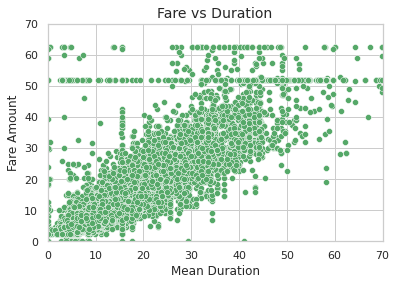

In [375]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.set(style = 'whitegrid')
sns.scatterplot(x = df0['mean_duration'], y = df0['fare_amount'], color = 'g')
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Fare vs Duration', fontsize = 14)
plt.xlabel('Mean Duration', fontsize = 12)
plt.ylabel('Fare Amount', fontsize = 12)

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [376]:
### YOUR CODE HERE ###
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [377]:
# Set pandas to display all columns
### YOUR CODE HERE ###

pd.set_option('display.max.columns', None)
df0[df0['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sun,Mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Sat,Jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Sat,Nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wed,Dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sun,Sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tue,Feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Mon,Jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thu,Aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tue,Sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sun,Apr,0


**Question:** What do you notice about the first 30 trips?

It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and $5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.


### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [378]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   pickup_time            22698 non-null  datetime64[ns]
 3   dropoff_time           22699 non-null  object        
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [384]:
### YOUR CODE HERE ###
df2 = df0.copy()
df2 = df2[['VendorID', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]
df2.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

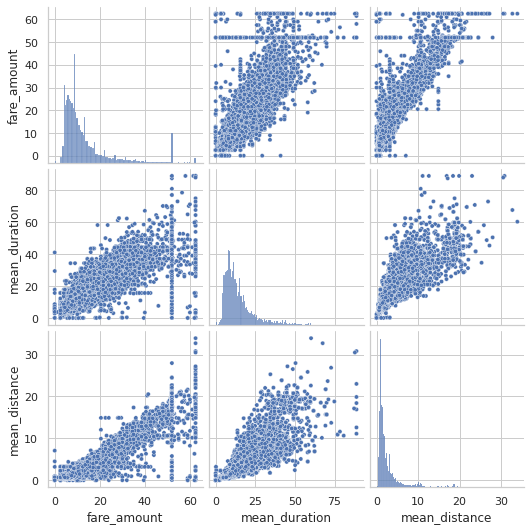

In [387]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
            plot_kws= {'size':3})


These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [400]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df2.corr(method = 'pearson').style.background_gradient(cmap='Blues')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266557,0.001285,0.004891,0.002003,-0.002816
passenger_count,0.266557,1.000000,0.015042,0.013491,0.015901,-0.022012
fare_amount,0.001285,0.015042,1.000000,0.910190,0.859284,-0.020000
mean_distance,0.004891,0.013491,0.910190,1.000000,0.874964,-0.039679
mean_duration,0.002003,0.015901,0.859284,0.874964,1.000000,-0.021583
rush_hour,-0.002816,-0.022012,-0.020000,-0.039679,-0.021583,1.000000


Visualize a correlation heatmap of the data.

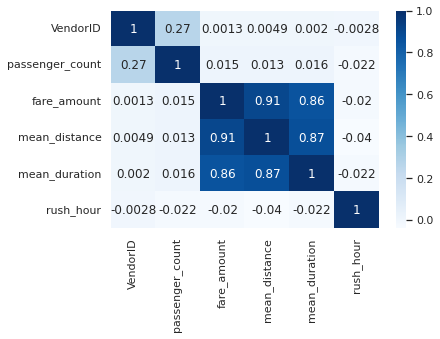

In [399]:
# Create correlation heatmap
### YOUR CODE HERE ###
sns.heatmap( df2.corr(method = 'pearson'), annot=True, cmap = 'Blues')

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [435]:
### YOUR CODE HERE ###
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  object 
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [415]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
x = df2.drop(columns = 'fare_amount')

# Set y variable
### YOUR CODE HERE ###

y = df2[['fare_amount']]
# Display first few rows
### YOUR CODE HERE ###
x.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [417]:
# Convert VendorID to string
### YOUR CODE HERE ###

df2['VendorID'] = df2['VendorID'].astype(str)

# Get dummies
### YOUR CODE HERE ###
x = pd.get_dummies(x, drop_first = True)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2
0,6,3.521667,22.847222,0,0,1
1,1,3.108889,24.470370,0,1,0
2,1,0.881429,7.250000,1,1,0
3,1,3.700000,30.250000,0,0,1
4,1,4.435000,14.616667,0,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [418]:
# Create training and testing sets
#### YOUR CODE HERE ####
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [419]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)

print('X_train scaled:', x_train_scaled)

X_train scaled: [[-0.50454783 -0.61605394 -0.95515589 -0.64890019 -0.89513669  0.89525076]
 [-0.50454783 -0.50327831 -0.76037618 -0.64890019 -0.89513669  0.89525076]
 [-0.50454783  1.6422318   1.60214844 -0.64890019 -0.89513669  0.89525076]
 ...
 [-0.50454783 -0.45087997 -0.67692385 -0.64890019  1.11714782 -1.11700547]
 [-0.50454783 -0.58791781 -0.85451743  1.54106904  1.11714782 -1.11700547]
 [ 1.82004925  0.82590264  1.12444574 -0.64890019 -0.89513669  0.89525076]]


### Fit the model

Instantiate your model and fit it to the training data.

In [420]:
# Fit your model to the training data
### YOUR CODE HERE ###

lr=LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [421]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###

r_sq = lr.score(x_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(x_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.838762573544844
R^2: 0.838762573544844
MAE: 2.2019688560169404
MSE: 18.269976419452387
RMSE: 4.274339296248297


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [423]:
# Scale the X_test data
### YOUR CODE HERE ###
x_test_scaled = scaler.transform(x_test)

In [424]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
# Evaluate the model performance on the testing data
r_sq_test = lr.score(x_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(x_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8621510304343762
R^2: 0.8621510304343762
MAE: 2.1264240786782094
MSE: 14.606207083463776
RMSE: 3.821806782591681


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [426]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head(10)


,actual,predicted,residual
5818,14.0,12.349106,1.650894
18134,28.0,16.301813,11.698187
4655,5.5,6.738378,-1.238378
7378,15.5,16.212453,-0.712453
13914,9.5,10.556810,-1.056810
308,23.5,20.910946,2.589054
3061,39.5,37.000771,2.499229
12401,57.5,37.642162,19.857838
5662,24.5,22.974400,1.525600
21767,8.0,8.690369,-0.690369


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

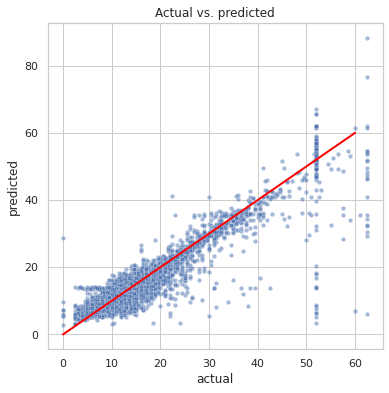

In [427]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

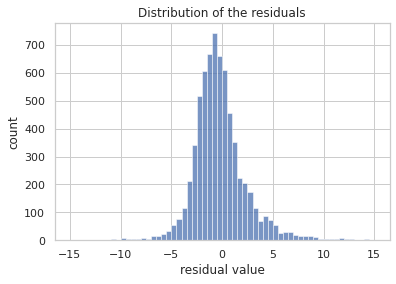

In [428]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###

sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [429]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

-0.04527070650932036

Create a scatterplot of `residuals` over `predicted`.

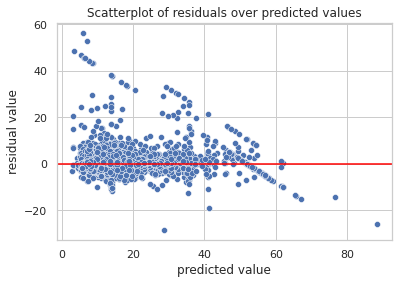

In [430]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [432]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=x.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2
0,0.042715,7.181591,2.824265,0.118445,1.502997,1.441264


What do these coefficients mean? How should they be interpreted?

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.


In [434]:
# 1. Calculate SD of `mean_distance` in X_train data
print(x_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / x_train['mean_distance'].std())

3.606093533690714
1.9782811880363875


### Task 9d. Conclusion

**What are the key takeaways from this notebook?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).

**What results can be presented from this notebook?**

*  You can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.
